# Data facts and import


In [1]:
import pandas as pd
#local directory 
reviewdf =pd.read_csv('train.csv')
#Data credit 

In [2]:
reviewdf.shape


(38932, 5)

In [3]:
reviewdf.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
reviewdf.tail()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy
38931,id49257,The Westin is a wonderfully restored grande da...,Mozilla,Desktop,happy


In [5]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
reviewdf.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# Data cleaning \ EDA


In [7]:
##CHEAKING MISSINFG VALUE IN THE DATA SET AND PERCENTAGE FOR MISSING VALUES FOR EACH COLUMNSCOUNT.


In [8]:
count = reviewdf.isnull().sum().sort_values(ascending=False)
percentage =((reviewdf.isnull().sum()/len(reviewdf)*100)).sort_values(ascending=False)
missing_data =pd.concat([count,percentage],axis=1,
keys=['count','percentage'])

print('count and percentage of missing values for the columns:')
missing_data

count and percentage of missing values for the columns:


,count,percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


percentage for defalt 

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


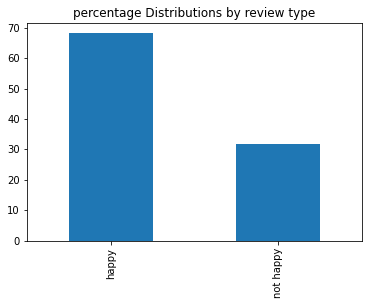

In [9]:
##cheaking for the distributuion of defalut
import matplotlib.pyplot as plt 
%matplotlib inline
print('percentage for defalt \n')
print(round(reviewdf.Is_Response.value_counts(normalize=True)*100,2))
round(reviewdf.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('percentage Distributions by review type')
plt.show()

In [10]:
#removing unesessary columns
reviewdf.drop(columns =['User_ID','Browser_Used','Device_Used'],inplace=True)

In [11]:
reviewdf.shape

(38932, 2)

In [12]:
#data cleaning
import re 
import string

#convert to lower case, removes squre bracket ,removes nimbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w\d\w','',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [13]:
#Updated text
reviewdf['cleaned_description']=pd.DataFrame(reviewdf.Description.apply(cleaned1))
reviewdf.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [14]:
# second step of cleaning
def text_clean_2(text):
    text = re.sub('[''"";]','',text)
    text = re.sub('\n','',text)
    return text 

cleaned2 = lambda x:text_clean_2(x)

In [15]:
#updated text
reviewdf['cleaned_description_new'] =pd.DataFrame(reviewdf['cleaned_description'].apply(cleaned2))

In [16]:
reviewdf.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


# MODEL TRAINING

In [17]:
from sklearn.model_selection import train_test_split

Independent_var = reviewdf.cleaned_description_new
Dependent_var = reviewdf.Is_Response

IV_train, IV_test, DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size =0.1,random_state=225)

print('IV_train:',len(IV_train))

print('IV_test:',len(IV_test))

print('DV_train:',len(DV_train))

print('DV_test:',len(DV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [18]:
from transformers import pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 =LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

In [20]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train,DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions,DV_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2417,  304],
       [ 154, 1019]], dtype=int64)

# Model prediction


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy :', accuracy_score(predictions, DV_test))
print('precision :',precision_score(predictions, DV_test, average='weighted'))
print('Recall :',recall_score(predictions,DV_test,average='weighted'))

Accuracy : 0.8823831535695943
precision : 0.8889271415963718
Recall : 0.8823831535695943


# testing

In [26]:
example =[' good service']
result = model.predict(example)

print(result)

['happy']
